# GRIP : THE SPARKS FOUNDATION

## Data Science and Business Analytics intern

## Author : Salma Gaamoussi

## Task 02 : Prediction using Unsupervised ML - K Means clustering 


  > Predict the optimum number of clusters & visualization using Iris Dataset.

###  1)<u>Import the dataset</u>


In [42]:
#libraries import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans


In [43]:
#reading the Iris dataset
data = pd.read_csv('Iris.csv')

### 2)<u>Data visualization</u>

In [44]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
data.shape

(150, 6)

In [46]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [47]:
#modalities of the Species column
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [49]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


We drop label columns, because it's an unsupervised ML problem.

In [53]:
iris_df = pd.DataFrame(data)
iris_df = iris_df.drop(columns= ['Species','Id'])

### 3)<u>The Optimum number of clusters</u>
We will run the cluster analysis 12 times, and we store the WCSS score in the within_cluster_sum_of_square table in order to create the Elbow plot.

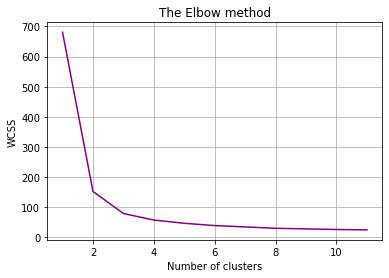

In [55]:
# Finding the Optimum number of clusters for K-means classification

within_cluster_sum_of_square = []

for k in range(1, 12):
    kms = KMeans(n_clusters = k)
    kms = kms.fit(iris_df)
    within_cluster_sum_of_square.append(kms.inertia_)
    
# plotting the results 
plt.plot(range(1, 12), within_cluster_sum_of_square, color='purple')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

From this graph, we choose the number of clusters as 3.

### 4)<u>Applying K means clustering</u>

In [56]:
model = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init=10, random_state = 0)
prediction = model.fit_predict(iris_df)

### 5)<u>Clusters visualization</u>

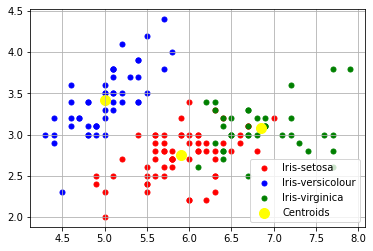

In [58]:
x = iris_df.iloc[:, [0,1,2,3]].values

plt.scatter(x[prediction == 0, 0], x[prediction == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[prediction == 1, 0], x[prediction == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[prediction == 2, 0], x[prediction == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s=100, c='yellow',label='Centroids')
plt.legend()
plt.grid()
plt.show()